# Study of Energy Consumption at Royal Caribbean - Dhiraj Maheswari

## Introduction 

This notebook aims to analyze the energy consumption data at the Royal Caribbean and tries to see the possible reasons behind it. As the ultimate goal is to reduce the energy consumption, it is very necessary to identify the factor(s) on which it might depend. This would require studying the dependence of energy consumption with various possible factors.

Firstly, we import the libraries and load the necessary data we would require to do the analysis. 

In [100]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
from datetime import datetime

data = pd.read_csv('Documents/Royal Carrebian/data.csv')
print("Number of records:", data.shape[0],"|||", "Number of features:", data.shape[1])

# convert date entries to datetime object for better manipulation purposes
data['date'] = pd.to_datetime(data['date'])
# this will then be split into month, day, time, hour, minutes
# we leave out the year for now, as it is the same for all records.
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day
data['time'] = data['date'].dt.time
data['hour'] = data['date'].dt.hour
data['minutes'] = data['date'].dt.minute
del(data['date'], data['time']) # remove the unwanted date column for now


# extract only for the month of january
data_m1 = data[data['month'] == 1]
# just some sanity checks, make sure all the columns are intact, verify the data types etc.
print("Names of the columns:")
print(data_m1.columns)
print("Data types:")
print(data_m1.dtypes)
print("First 3 records:")
print(data_m1.head(3))
print("Basic statistics on the data:")
print(data_m1.describe())

print('Basic info on data types:')
print(data_m1.info())



Number of records: 19735 ||| Number of features: 25
Names of the columns:
Index(['TotalConsmp', 'R1', 'H_1', 'R2', 'H_2', 'R3', 'H_3', 'R4', 'H_4', 'R5',
       'H_5', 'R6', 'H_6', 'R7', 'H_7', 'R8', 'H_8', 'R9', 'H_9',
       'TempOutSide', 'Press_mm_hg', 'H_OutSide', 'Windspeed', 'Visibility',
       'month', 'day', 'hour', 'minutes'],
      dtype='object')
Data types:
TotalConsmp      int64
R1             float64
H_1            float64
R2             float64
H_2            float64
R3             float64
H_3            float64
R4             float64
H_4            float64
R5             float64
H_5            float64
R6             float64
H_6            float64
R7             float64
H_7            float64
R8             float64
H_8            float64
R9             float64
H_9            float64
TempOutSide    float64
Press_mm_hg    float64
H_OutSide      float64
Windspeed      float64
Visibility     float64
month            int64
day              int64
hour             int64
minut

The good thing we see here is we have no missing data to deal with, along with no directly visible anamolies. Next, we try to see what the average temperature across various rooms look like. Interestingly, we find that the average temperature across all the rooms for the month of January is $16.907 ^{\circ}$C, while for all the five months is $19.382 ^{\circ}$C. We do notice that $\textbf{Room 6}$ is relatively cold ($\approx 8^\circ$ C) compared to other rooms, as can be seen below. One can assume the design and/or location of the room could be an issue here [not sure].

In [106]:
'''here, we calculate the average temperature over all rooms
   once for the month of january
   next for all the months
'''
t = 0.0
print('For the month of January:')
for i in range(9):
    room_no = 'R'+str(i+1)
    print("Avg. Temperature in %s: %0.3f Celcius" %(room_no, data_m1[room_no].mean()))
    t+= data_m1[room_no].mean()

print('**********')
print('Average temperature over all the rooms in January: %0.3f Celcius' %(t/9.0))

print('For all the months:')
tm=0.0
for i in range(9):
    room_no = 'R'+str(i+1)
    print("Avg. Temperature in %s: %0.3f Celcius" %(room_no, data[room_no].mean()))
    tm+= data[room_no].mean()

print('**********')
print('Average temperature over all the rooms for all months: %0.3f Celcius' %(tm/9.0))

print('**********')
h_avg, h_tot = 0.0, 0.0
for i in range(9):
    humidity_room ='H_'+str(i+1)
    v = data[humidity_room].mean()
    print('Average humidity for all months in room: %i : %0.3f %%' %(i+1, v))
    h_tot+=v
h_avg = h_tot/9.9
print("Average humidity over all the rooms for all months: %0.3f %%" % h_avg)


For the month of January:
Avg. Temperature in R1: 19.945 Celcius
Avg. Temperature in R2: 19.102 Celcius
Avg. Temperature in R3: 19.876 Celcius
Avg. Temperature in R4: 18.487 Celcius
Avg. Temperature in R5: 17.568 Celcius
Avg. Temperature in R6: 3.895 Celcius
Avg. Temperature in R7: 17.603 Celcius
Avg. Temperature in R8: 18.995 Celcius
Avg. Temperature in R9: 16.694 Celcius
**********
Average temperature over all the rooms in January: 16.907 Celcius
For all the months:
Avg. Temperature in R1: 21.687 Celcius
Avg. Temperature in R2: 20.341 Celcius
Avg. Temperature in R3: 22.268 Celcius
Avg. Temperature in R4: 20.855 Celcius
Avg. Temperature in R5: 19.592 Celcius
Avg. Temperature in R6: 7.911 Celcius
Avg. Temperature in R7: 20.267 Celcius
Avg. Temperature in R8: 22.029 Celcius
Avg. Temperature in R9: 19.486 Celcius
**********
Average temperature over all the rooms for all months: 19.382 Celcius
**********
Average humidity for all months in room: 1 : 40.260 %
Average humidity for all months

In [36]:
'''now, subset the entire data for separate months
   for sake of simplicity of plotting and all.
'''
data_m2 = data[data['month'] == 2]
data_m3 = data[data['month'] == 3]
data_m4 = data[data['month'] == 4]
data_m5 = data[data['month'] == 5]
print('Data subsetting finished.')



Data subsetting finished.


## Exploratory Data Analysis

The first step we need to take is to try to figure out the relationship between the dependent and independent variables. This is done by studying series of different kinds of plots.
We aim to see how the total energy consumption varies each month at different hours of the day. For this, we just group the data for each month by hours and calculate the mean energy consumption and create a bar plot. A plot of average energy consumption over months can also be created.

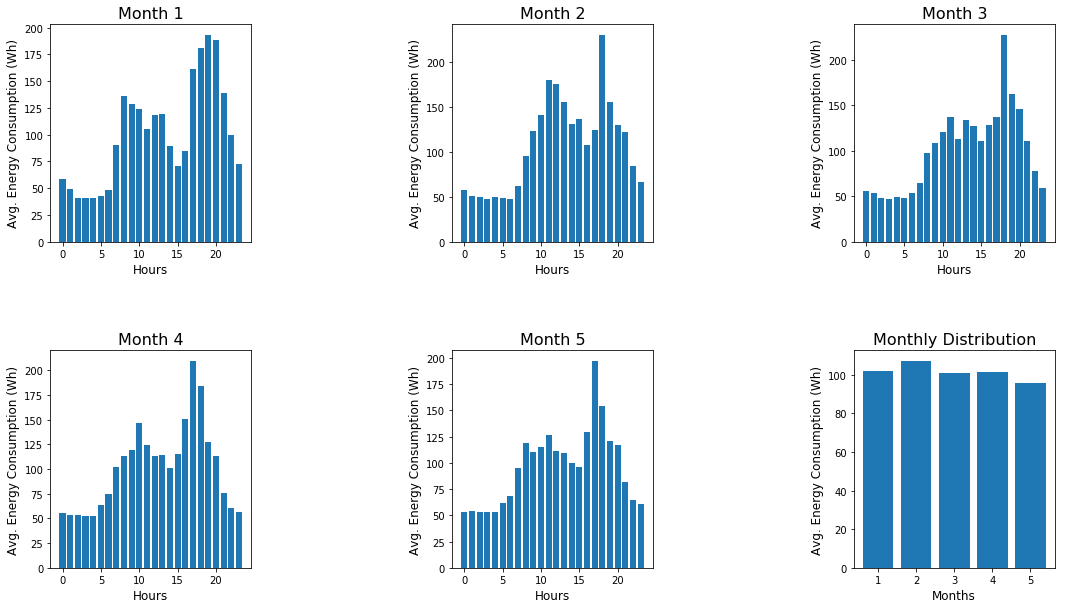

In [59]:
xpos = np.arange(len(data_m1.hour.unique())) # for labels on the horizontal axis, for energy consump vs hour type plot

xpos_month = np.arange(1, len(data['month'].unique())+1) # for energy consump vs month type plot

# calculate hourly averaged energy consumption for each month, these are all Pandas Series object 
hourly_averaged_consmp_m1 = data_m1.groupby('hour')['TotalConsmp'].mean()
hourly_averaged_consmp_m2 = data_m2.groupby('hour')['TotalConsmp'].mean()
hourly_averaged_consmp_m3 = data_m3.groupby('hour')['TotalConsmp'].mean()
hourly_averaged_consmp_m4 = data_m4.groupby('hour')['TotalConsmp'].mean()
hourly_averaged_consmp_m5 = data_m5.groupby('hour')['TotalConsmp'].mean()

monthly_avg_consmp = data.groupby('month')['TotalConsmp'].mean() # this is simply monthly averaged energy consumption.

'''we create plots in 2 X 3 matrix. this means, we have 2 rows and 3 columns, where each
   intersection of row and column will hold a plot.
   Formatting of the axes labels are left for now, we just stick with the defaults.
'''
def energy_consump_plot(ax, x, y, x_label=None, y_label = None, title = None, fontsize=12):
    '''
    create bar plot using x as indices, where the bars will be placed;
    y as height of the bar.
    '''
    ax.bar(x,y) 
    ax.set_xlabel(x_label, fontsize=fontsize)
    ax.set_ylabel(y_label, fontsize=fontsize)
    ax.set_title(title, fontsize=16)



#fig = plt.figure(figsize=(18,12))

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3, figsize=(18,10))
fig.subplots_adjust(hspace = 0.5, wspace = 1.0) # wspace is width spacing, hspace is height spacing

energy_consump_plot(ax1, xpos, hourly_averaged_consmp_m1, 'Hours', 'Avg. Energy Consumption (Wh)', 'Month 1')
energy_consump_plot(ax2, xpos, hourly_averaged_consmp_m2, 'Hours', 'Avg. Energy Consumption (Wh)', 'Month 2')
energy_consump_plot(ax3, xpos, hourly_averaged_consmp_m3, 'Hours', 'Avg. Energy Consumption (Wh)', 'Month 3')
energy_consump_plot(ax4, xpos, hourly_averaged_consmp_m4, 'Hours', 'Avg. Energy Consumption (Wh)', 'Month 4')
energy_consump_plot(ax5, xpos, hourly_averaged_consmp_m5, 'Hours', 'Avg. Energy Consumption (Wh)', 'Month 5')
energy_consump_plot(ax6, xpos_month, monthly_avg_consmp, 'Months', 'Avg. Energy Consumption (Wh)', 'Monthly Distribution')


plt.show()


#### <a name='fig1'></a>Fig. (1)

In above plots, we observe that for each month, the average energy consumption in the early morning hours is well below the average energy consumption ($\approx 101.75$ Wh). However, around the 15:00 to 19:00 hours, the energy consumption is the most, almost twice the average. However, the average monthly energy consumption doesn't seem to vary as much. This allows us to understand that almost everyone is consuming energy in one form or other.


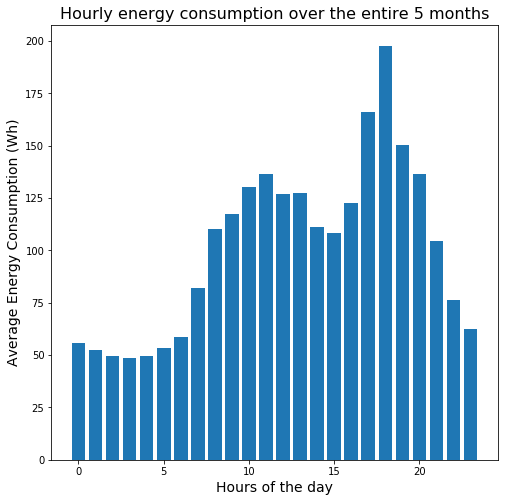

In [74]:
# get te hourly average energy consumption over the entire data
hourwise_grp = data.groupby('hour')['TotalConsmp'].mean()
plt.figure(figsize=(8,8))
plt.bar(hourwise_grp.index,hourwise_grp)
plt.xlabel('Hours of the day', fontsize = 14)
plt.ylabel('Average Energy Consumption (Wh)', fontsize = 14)
plt.title('Hourly energy consumption over the entire 5 months', fontsize = 16)
plt.show()


#### Fig. (2)

This plot shows that the average energy consumption over the 24 hours period for the 5 months. It is easily observed that the average consumption during the early hours is less, but during the late afternoon hours, we find rise in the consumption. We see somewhat exponential trend in the rise of energy consumption from early hours to the afternoon; and an exponential drop after 1800 hours. 

Next, we look how the average temperatures (for all the rooms) are like for all the months. We do this also for the energy consumption. The calculation follows in the next two cells.

In [67]:
def avg_room_temp_for_all_months(list_of_data):
    '''
    function to calculate average room temperature.
    list_of_data: the list of datasets [or subset] for each month.
    return value: a list with average values of the temperature across
    all the rooms for each month. each item in the returned list will
    represent the averaage temperature of the nine rooms for months 1,2,3,4 and 5.
    '''
         
    ans = []
    for l in list_of_data:
        t = 0.0
        for i in range(9):
            room_no = 'R'+str(i+1)
            t+= l[room_no].mean()
        ans.append(round(t/9.0,3)) # since there are nine rooms
    return ans


list_of_all_months_data = [data_m1, data_m2, data_m3, data_m4, data_m5]

avg_room_temp =avg_room_temp_for_all_months(list_of_all_months_data)
print(avg_room_temp) # this will print the list of temperature of all the rooms averaged
                                                             # for the 5 months we have.


[16.907, 18.298, 18.673, 19.99, 22.572]


In [66]:
def avg_energy_for_all_months(list_of_data):
    '''
    function to calculate average monthly energy consumption.
    list_of_data: the list of datasets [or subset] for each month.
    return value: a list with average values of energy consumption.
    each item in the returned list will represent the averaage energy
    consupmtion of the nine rooms for months 1,2,3,4 and 5.
    '''
         
    ans = []
    for l in list_of_data:
        t = 0.0
        t+= l['TotalConsmp'].mean()
        ans.append(round(t,3)) 
    return ans

avg_energy_consmp = avg_energy_for_all_months([data_m1, data_m2, data_m3, data_m4, data_m5])

print(avg_energy_consmp)


[101.749, 107.289, 100.869, 101.306, 95.969]


Next, we plot the daily energy consumption for each month and for all the months. This will allow us to see how the energy is consumed on say, later half of the month compared to the first half of the month.

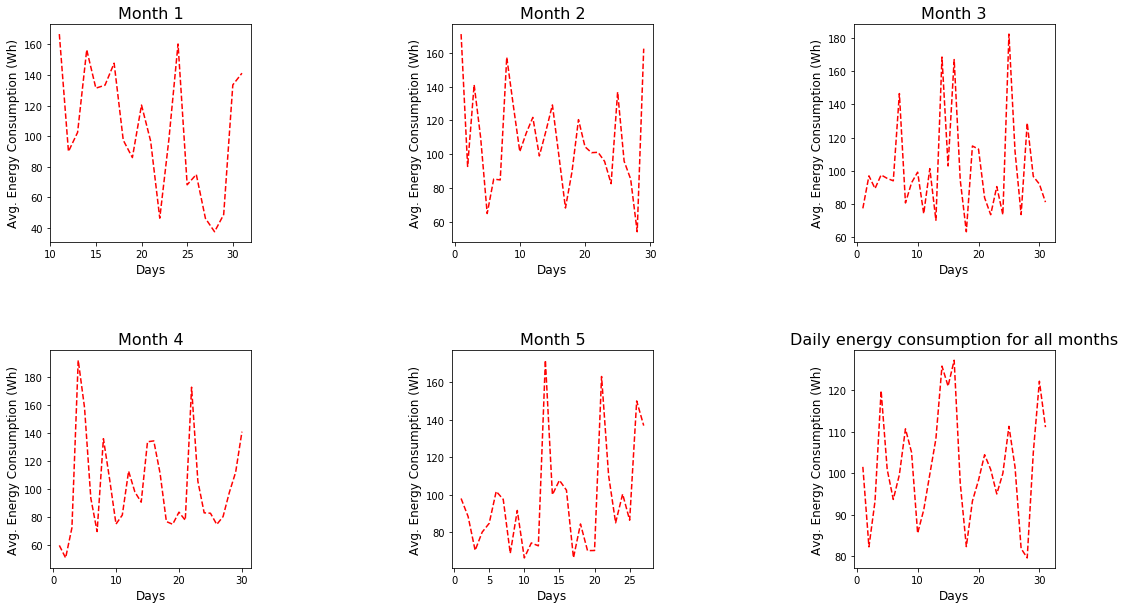

In [80]:
# calculate daily averaged energy consumption for each month, these are all Pandas Series object 
daywise_averaged_consmp_m1 = data_m1.groupby('day')['TotalConsmp'].mean()
daywise_averaged_consmp_m2 = data_m2.groupby('day')['TotalConsmp'].mean()
daywise_averaged_consmp_m3 = data_m3.groupby('day')['TotalConsmp'].mean()
daywise_averaged_consmp_m4 = data_m4.groupby('day')['TotalConsmp'].mean()
daywise_averaged_consmp_m5 = data_m5.groupby('day')['TotalConsmp'].mean()

daily_consumption_allmonths = data.groupby('day')['TotalConsmp'].mean() # this is simply daily averaged energy consumption.

'''we create plots in 2 X 3 matrix. this means, we have 2 rows and 3 columns, where each
   intersection of row and column will hold a plot.
   Formatting of the axes labels are left for now, we just stick with the defaults.
'''
def daily_energy_consump_plot(ax, x, y, x_label=None, y_label = None, title = None, fontsize=12):
    '''
    create bar plot using x as indices,
    y as height of the bar.
    '''
    ax.plot(x,y, 'r--') # use red dashed line 
    ax.set_xlabel(x_label, fontsize=fontsize)
    ax.set_ylabel(y_label, fontsize=fontsize)
    ax.set_title(title, fontsize=16)


fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3, figsize=(18,10))
fig.subplots_adjust(hspace = 0.5, wspace = 1.0) # wspace is width spacing, hspace is height spacing

daily_energy_consump_plot(ax1, daywise_averaged_consmp_m1.index, daywise_averaged_consmp_m1, 'Days',
                    'Avg. Energy Consumption (Wh)', 'Month 1')
daily_energy_consump_plot(ax2, daywise_averaged_consmp_m2.index, daywise_averaged_consmp_m2, 'Days',
                    'Avg. Energy Consumption (Wh)', 'Month 2')
daily_energy_consump_plot(ax3, daywise_averaged_consmp_m3.index, daywise_averaged_consmp_m3, 'Days',
                    'Avg. Energy Consumption (Wh)', 'Month 3')
daily_energy_consump_plot(ax4, daywise_averaged_consmp_m4.index, daywise_averaged_consmp_m4, 'Days', 
                    'Avg. Energy Consumption (Wh)', 'Month 4')
daily_energy_consump_plot(ax5, daywise_averaged_consmp_m5.index, daywise_averaged_consmp_m5, 'Days', 
                    'Avg. Energy Consumption (Wh)', 'Month 5')

daily_energy_consump_plot(ax6, daily_consumption_allmonths.index, daily_consumption_allmonths, 'Days',
                          'Avg. Energy Consumption (Wh)','Daily energy consumption for all months')


plt.show()


#### Fig. (3)

These plots show that, on an average, more energy is consumed during the middle and end of the month. However, the lesser consumption during other days of the month might negate this effect. Next, we observe how the Total Energy Consumption might be related to other variables, like room temperature, outside temperature, humidity inside and outside, windspeed etc. For, this we use the pandas `corr` function to calculate the $\textbf{pearson correlation}$ coefficients between the dependent and independent variables.

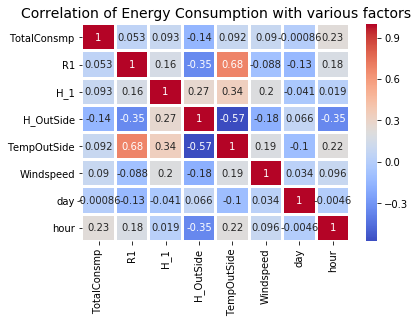

In [109]:
# prepare data to calculate corrleations 
import seaborn as sns
co=data[['TotalConsmp','R1', 'H_1', 
         'H_OutSide','TempOutSide','Windspeed', 'day','hour']].corr()
sns.heatmap(co,annot =True, linewidths=2, square=False, cmap='coolwarm')
plt.title('Correlation of Energy Consumption with various factors', fontsize = 14)
plt.show()

#### <a name='fig4'></a>Fig. (4)

We see almost no correlation between the $\textbf{energy consumption}$ and $\textbf{day}$, while there is a positive corrleation between $\textbf{energy consumption}$ and $\textbf{hour}$ and $\textbf{outside temperature}$ (small), which was also trivial from previous bar plots. We also observe a negative correlation of energy consumption with $\textbf{outside humidity}$. A similar correlation plot just for the month of February (month 2) is also shown below.

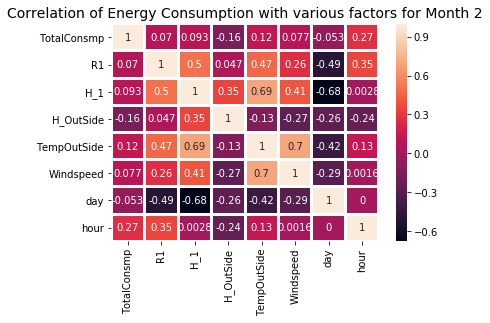

In [108]:
co_m2=data_m2[['TotalConsmp','R1', 'H_1', 
         'H_OutSide','TempOutSide','Windspeed', 'day','hour']].corr()
sns.heatmap(co_m2,annot =True, linewidths = 2)
plt.title('Correlation of Energy Consumption with various factors for Month 2', fontsize = 14)
plt.show()

#### Fig. (5)

Another interesting thing to look for would be the correlation of Total Energy Consumption with the room temperatures and room humidity levels. For this, we can expect that there will be some correlation, but no more than 10$\%$. It should be also interesting to see if Room 6 (which had somewhat unsual average temperature comapred to other rooms) will have the heighest correlation. For this, we simply compute the corrleation (in the entire data) and plot the heat maps, as shown below.

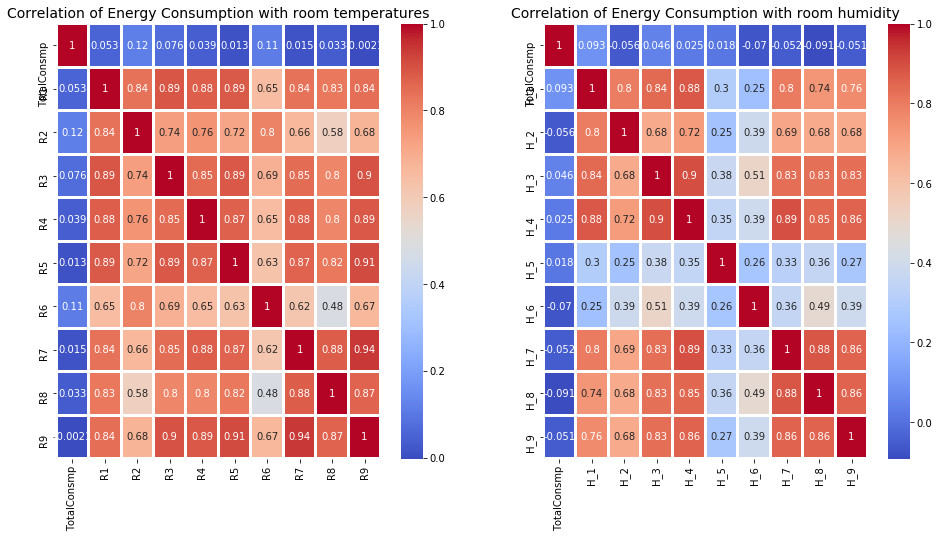

In [126]:
plt.subplots(figsize = (16,8))
plt.subplots_adjust(wspace = 0.2) # adjust horizontal space between the two plots
plt.subplot(1,2,1)
all_corrleation=data[['TotalConsmp','R1', 'R2', 'R3','R4','R5',
         'R6', 'R7','R8','R9']].corr()
sns.heatmap(all_corrleation,annot =True, linewidths=2, square=False, cmap='coolwarm')
plt.title('Correlation of Energy Consumption with room temperatures', fontsize=14)

plt.subplot(1,2,2)
all_corrleation_hum=data[['TotalConsmp','H_1', 'H_2', 'H_3','H_4','H_5',
         'H_6', 'H_7','H_8','H_9']].corr()
sns.heatmap(all_corrleation_hum,annot =True, linewidths=2, square=False, cmap='coolwarm')
plt.title('Correlation of Energy Consumption with room humidity', fontsize=14)

plt.show()

#### Fig. (6)

As expected, we find the correlation between energy consumption and temperature of room 6 is highest. An extra information we can note from this heat map is the correleation of room 2 temperature, which is comparable to room 6. We also observe that a little more than half of the room's humidity level is negatively correlated with the energy consumption.

## Building Predictive Models-An Example

For building a simple predictive model, we assume that the relationship between the dependent and independent variables are linear (which is clearly not the case) and use a model defined as,
\begin{equation}
y = \beta + \sum_i \alpha_i x_i,
\end{equation}

where $\beta$ is a constant, $\alpha_i$'s are the coefficients that needs to be determined, $x_i$'s are the independent variables or features, and $y$ is our target or dependent variable, the Total Energy Consumption.

For simplicity, let's first build a linear model and see how it performs. We would expect this to be very poor in performance. For this, first we import the necessary libraries, split the data for training and testing the model, followed by predicting the outcomes and measuring the performance. We also make a copy of the original data and work on it.

In [160]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

data_copy = data.copy()

# isolate dependent and independent features,
# remove the columns, assuming Press_mm_hg and Visibility are irrelevant, Visibility and minutes
X = data_copy.drop(['TotalConsmp', 'Press_mm_hg', 'Visibility','month','minutes'], axis = 1)

Y = data_copy[['TotalConsmp']] # target

# also convert the humidity values to floats
#for i in range(9):
#    hm = 'H_'+str(i+1)
#    X[hm] = X[hm].apply(lambda x: x/100.0)


#X['H_OutSide'] = X['H_OutSide']/100.0    
# divide data into training and testing sets, keeping 30% for testing purposes

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

print("Training and Testing data info:")
print("Training and Testing features: ", X_train.shape[1])
print("Training and Testing target:", Y_train.shape[1])

lm = LinearRegression()
lm.fit(X_train, Y_train)
preds = lm.predict(X_test)
print('Result of the model run:')
print("R^2: ", round(lm.score(X_test, Y_test),3)) # this value lies between 0 and 1, 1 meaning model was able 
                                                    # to explain all the variation. 1 is the best, 0 is the worst
print("Mean square error: ", round(mean_squared_error(Y_test,preds),3))





Training and Testing data info:
Training and Testing features:  23
Training and Testing target: 1
Result of the model run:
R^2:  0.167
Mean square error:  9752.618


In [192]:
errors = abs(preds - Y_test)
print('Mean Absolute Error:', round(np.mean(errors.values), 2))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / Y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape.values)
print('Accuracy:', round(accuracy, 2),'%.')

Mean Absolute Error: 55.08
Accuracy: 38.4 %.


As expected, this model performance was very poor, as the explained variance was only 16.7 $\%$ and the accuracy was 38.4$\%$. Few probable reasons for this could be:
- multicollinearity in the features
- possible increase in sample
- choice of wrong model!
It should be noted that since we didn't set the ``random_state`` while initializing the ``LinearRegression`` model, the $R^2$ value might change.
Since we seem multicollinearity in the data as seen in [Fig. (4)](#fig4), we could try using the $\textbf{Ridge Rigression}$, for which the residuals are of the form
\begin{equation}
R = \sum_i(y_i - \hat{y}_i)^2 + \lambda \sum_i \beta_i^2,
\end{equation}

where the first factor on the right hand side is simply the residuals in the regular linear regression, while the second term represents what is called the $\textbf{Regularization term}$. The reason for doing this is to punish the residual/loss function for high values of the coefficients. The factor $\lambda$ is a scalar and also needs to be learnt, for which we can use the technique of cross-validation (which will be skipped here.)

In [167]:
from sklearn.linear_model import Ridge
ridge_regressor = Ridge(alpha = 50.0)
'''higher the alpha value, more restriction on the coefficients;
   low alpha > more generalization, coefficients are barely restricted and in this case linear and ridge regression resembles
   the choice of alpha is not trivial, but several trials can be performed.
   Another option will be to use RidgeCV and supply several values of alphas so that it will
   choose the best alpha for us. 
   The use value of 50 for alpha was obtained using RidgeCV, when alphas=[0.1,10.0,50.0,100.0] was supplied 
'''

ridge_regressor.fit(X_train, Y_train)
ridge_predictions = ridge_regressor.predict(X_test)
print("Result of the model run:")
print("R^2: ",round(ridge_regressor.score(X_test, Y_test),3))
print("Mean squared error: ", round(mean_squared_error(Y_test, ridge_predictions),3))

Result of the model run:
R^2:  0.167
Mean squared error:  9754.541


We observe no observable difference between the ``LinearRegression`` and ``Ridge`` model run. Now, we are definitely sure we need to more sophisticated regression model, such as ``RandomForestRegressor``. Let's see what happens.

In [172]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor(n_estimators=100) # our forest is instantiated with 100 trees
rf_regressor.fit(X_train, Y_train['TotalConsmp'].ravel()) # RandomForestRegressor expects Y values as 1-D numpy arrays
rf_preds = rf_regressor.predict(X_test)

print("Result of model run:")
print("Score on test data: ", round(rf_regressor.score(X_test, Y_test),3))
print("Score on training data:", round(rf_regressor.score(X_train, Y_train),3))

Result of model run:
Score on test data:  0.583
Score on training data: 0.938


In [184]:
errors = abs(rf_preds - Y_test['TotalConsmp'].ravel())
print('Mean Absolute Error:', round(np.mean(errors), 2))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / Y_test['TotalConsmp'])
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')


Mean Absolute Error: 32.82
Accuracy: 69.47 %.


We find that the ``RandomForestRegressor`` is able to describe $\approx$ 94$\%$ and 58$\%$ of the variation in the data in the training and test data respectively with an accuracy of $\approx$70$\%$. This result is much better than the previous two versions of linear regression. Since we have 23 features to model our target variable, it might be more informative to see which features are the most important ones.

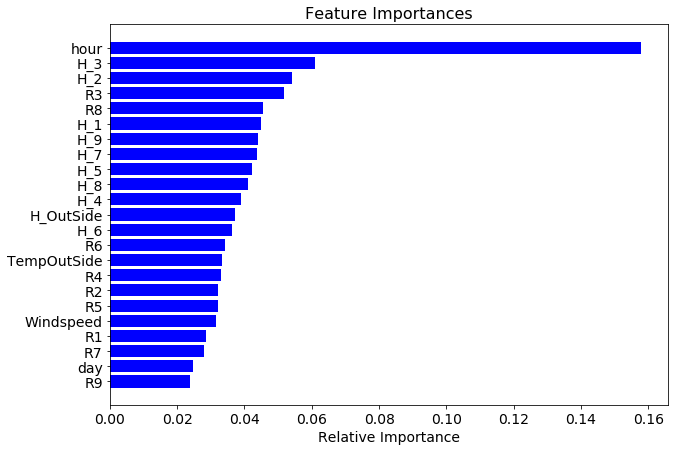

In [178]:
features = X_train.columns
importances = rf_regressor.feature_importances_

plt.figure(figsize = (10,7))
plt.title('Feature Importances', fontsize = 16)
plt.barh(range(len(importances)), importances[indices], color='b', align='center')
plt.yticks(range(len(importances)), features[indices], fontsize = 14)
plt.xticks(fontsize=14)
plt.xlabel('Relative Importance', fontsize = 14)
plt.show()

#### Fig. (7)

## Conclusions

As was also observed from the previous bar plots [Figs. (1) and (2)](#fig1), $\textbf{hour of the day}$ is the most important factor in the energy consumption. We also note that we can tune in some parameters and $\textit{hyperparameters}$ to check for the performance of the model. From these three models we tried, the ``RandomForestRegressor`` stands out by far. However, using this regressor with increasing number of decision trees and increasing depth might perform better at the price of computational time.
Although there are various other regression models (and we might try time-series forecasting too), for the sake of keeping things short, we don't try predicting with other model(s).

This analysis shows that regulating the activities during certain hours (specifically between 1500 to 1900 hours, see [Fig. (1)](#fig1) might help to reduce the energy consumption. Also, ability to properly regulating the room temperatures and humidity levels might be helpful to reduce the energy consumption.